In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from matplotlib import cm
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
import scipy.cluster.hierarchy as sch

#Librerias para graficar
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/202120_Laboratorio_2_datos_BancAlpes_credit_card_data.csv",sep=";", index_col="Id", na_values=["?","-"])
data

,Customer,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Id,,,,,,,,,,
1,87073.0,20000.0,Female,2,Married,24.0,2.0,1.0,1.0,0.0
2,38414.0,120000.0,Female,2,Single,26.0,3.0,0.0,10.0,9.0
3,17341.0,90000.0,Female,2,Single,34.0,7.0,1.0,3.0,4.0
4,40496.0,50000.0,Female,2,Married,37.0,5.0,1.0,1.0,NaN
5,47437.0,50000.0,Male,2,Married,57.0,6.0,0.0,12.0,3.0
...,...,...,...,...,...,...,...,...,...,...
656,51108.0,280000.0,Male,2,Married,39.0,10.0,1.0,10.0,0.0
657,60732.0,290000.0,Female,3,Single,27.0,10.0,1.0,13.0,2.0
658,53834.0,190000.0,Female,1,Single,28.0,8.0,1.0,9.0,1.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 1 to 660
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer             658 non-null    float64
 1   Limit_bal            659 non-null    float64
 2   Sex                  659 non-null    object 
 3   Education            659 non-null    object 
 4   Marriage             657 non-null    object 
 5   Age                  659 non-null    float64
 6   Total_Credit_Cards   658 non-null    float64
 7   Total_visits_bank    656 non-null    float64
 8   Total_visits_online  659 non-null    float64
 9   Total_calls_made     658 non-null    float64
dtypes: float64(7), object(3)
memory usage: 56.7+ KB


### Exploración de columnas

#### Transformación de columnas cualitativas

Data antes del procesamiento
 Female    372
Male      273
M           3
Mael        3
F           3
f           2
9           1
Fmale       1
Femael      1
Name: Sex, dtype: int64
Data después del procesamiento



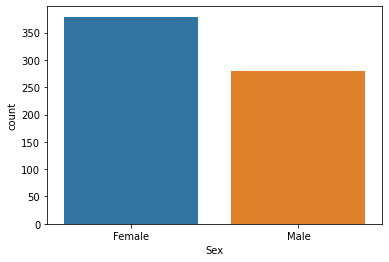

In [4]:
print("Data antes del procesamiento\n",data["Sex"].value_counts())
data["Sex"] = data["Sex"].replace("M","Male")
data["Sex"] = data["Sex"].replace("M ","Male")
data["Sex"] = data["Sex"].replace("Mael","Male")
data["Sex"] = data["Sex"].replace("F","Female")
data["Sex"] = data["Sex"].replace("f","Female")
data["Sex"] = data["Sex"].replace("Fmale","Female")
data["Sex"] = data["Sex"].replace("Femael","Female")
data["Sex"] = data["Sex"].replace("9",np.nan)
print("Data después del procesamiento\n")
ax = sns.countplot(x="Sex", data=data)

Data antes del procesamiento
 2      288
1      264
3       99
5        3
4        2
6        2
ABC      1
Name: Education, dtype: int64
Data después del procesamiento



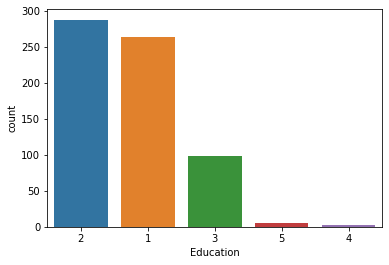

In [5]:
print("Data antes del procesamiento\n",data["Education"].value_counts())
data["Education"] = data["Education"].replace("ABC",np.nan)
data["Education"] = data["Education"].replace("6","5")
print("Data después del procesamiento\n")
ax = sns.countplot(x="Education", data=data)

Data antes del procesamiento
 Single     379
Married    260
Others       9
1            5
2            3
0            1
Name: Marriage, dtype: int64
Data después del procesamiento



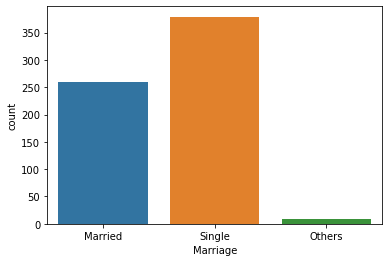

In [6]:
print("Data antes del procesamiento\n",data["Marriage"].value_counts())
data["Marriage"] = data["Marriage"].replace("1",np.nan)
data["Marriage"] = data["Marriage"].replace("2",np.nan)
data["Marriage"] = data["Marriage"].replace("0",np.nan)
print("Data después del procesamiento\n")
ax = sns.countplot(x="Marriage", data=data)

#### Transformación columnas cuantitativas

In [7]:
data_numeric=data[["Customer","Limit_bal","Age","Total_Credit_Cards","Total_visits_bank","Total_visits_online","Total_calls_made"]]
data_numeric.describe()

,Customer,Limit_bal,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,658.000000,659.000000,659.000000,6.580000e+02,656.00000,659.000000,658.000000
mean,55180.056231,170000.000000,95.218513,1.876290e+05,2.41311,2.602428,3.579027
std,25651.348197,129739.041329,1432.660847,4.812847e+06,1.63130,2.936469,2.868076
min,11265.000000,10000.000000,21.000000,1.000000e+00,0.00000,0.000000,0.000000
25%,33875.500000,50000.000000,28.000000,3.000000e+00,1.00000,1.000000,1.000000
50%,53907.000000,140000.000000,33.000000,5.000000e+00,2.00000,2.000000,3.000000
75%,77321.500000,240000.000000,41.000000,6.000000e+00,4.00000,4.000000,5.000000
max,99843.000000,630000.000000,36745.000000,1.234568e+08,5.00000,15.000000,10.000000


Se puede observar que el máximo de la edad es muy alto teniendo en cuenta la realidad y por lo tanto hay outliers. Se puede observar que el máximo de Total_credi_Cards es muy alto respecto al 75% por lo tanto hay outliers

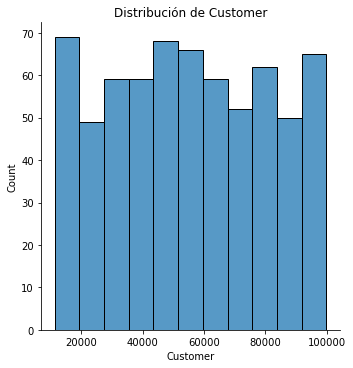

In [8]:
sns.displot(data["Customer"]).set(title="Distribución de Customer");

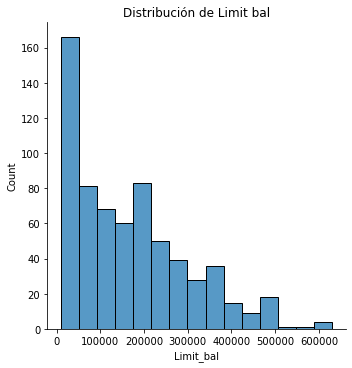

In [9]:
sns.displot(data["Limit_bal"]).set(title="Distribución de Limit bal");

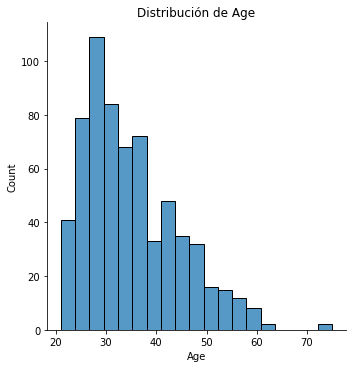

In [10]:
for i in range(0,3):
    data= data[data["Age"] < max(data["Age"])] #Aqui se quietaron los 3 valores más altos
sns.displot(data["Age"]).set(title="Distribución de Age");

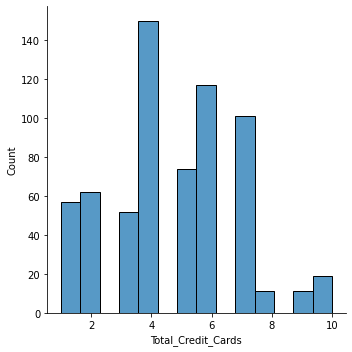

In [11]:
data= data[data["Total_Credit_Cards"] < max(data["Total_Credit_Cards"])] #Aqui se quietaron los 1 valores más altos
sns.displot(data["Total_Credit_Cards"]);

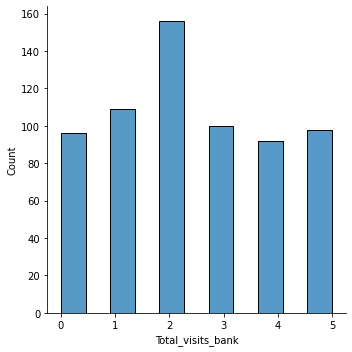

In [12]:
sns.displot(data["Total_visits_bank"]);

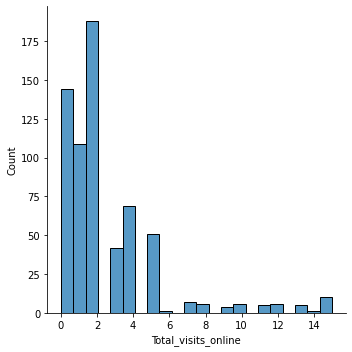

In [13]:
sns.displot(data["Total_visits_online"]);

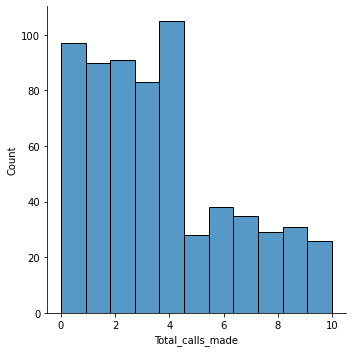

In [14]:
sns.displot(data["Total_calls_made"]);

#### Descripción de columnas numericas

In [15]:
data_numeric=data[["Customer","Limit_bal","Age","Total_Credit_Cards","Total_visits_bank","Total_visits_online","Total_calls_made"]]
data_numeric.describe()

,Customer,Limit_bal,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,653.000000,654.000000,654.000000,654.000000,651.000000,654.000000,653.000000
mean,55117.849923,170137.614679,35.064220,4.729358,2.425499,2.594801,3.560490
std,25659.817546,129589.336139,9.363454,2.161580,1.629128,2.944516,2.865294
min,11265.000000,10000.000000,21.000000,1.000000,0.000000,0.000000,0.000000
25%,33837.000000,52500.000000,28.000000,3.000000,1.000000,1.000000,1.000000
50%,53916.000000,140000.000000,33.000000,5.000000,2.000000,2.000000,3.000000
75%,77143.000000,240000.000000,41.000000,6.000000,4.000000,4.000000,5.000000
max,99843.000000,630000.000000,75.000000,10.000000,5.000000,15.000000,10.000000


En este puonto las variables numericas percen ser normales

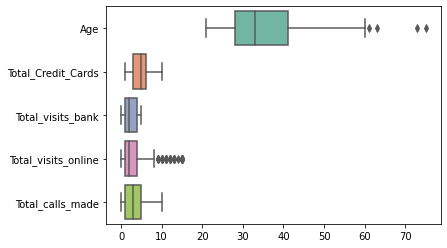

In [16]:
sns.boxplot(data=data_numeric[["Age","Total_Credit_Cards","Total_visits_bank","Total_visits_online","Total_calls_made"]], orient="h", palette="Set2");

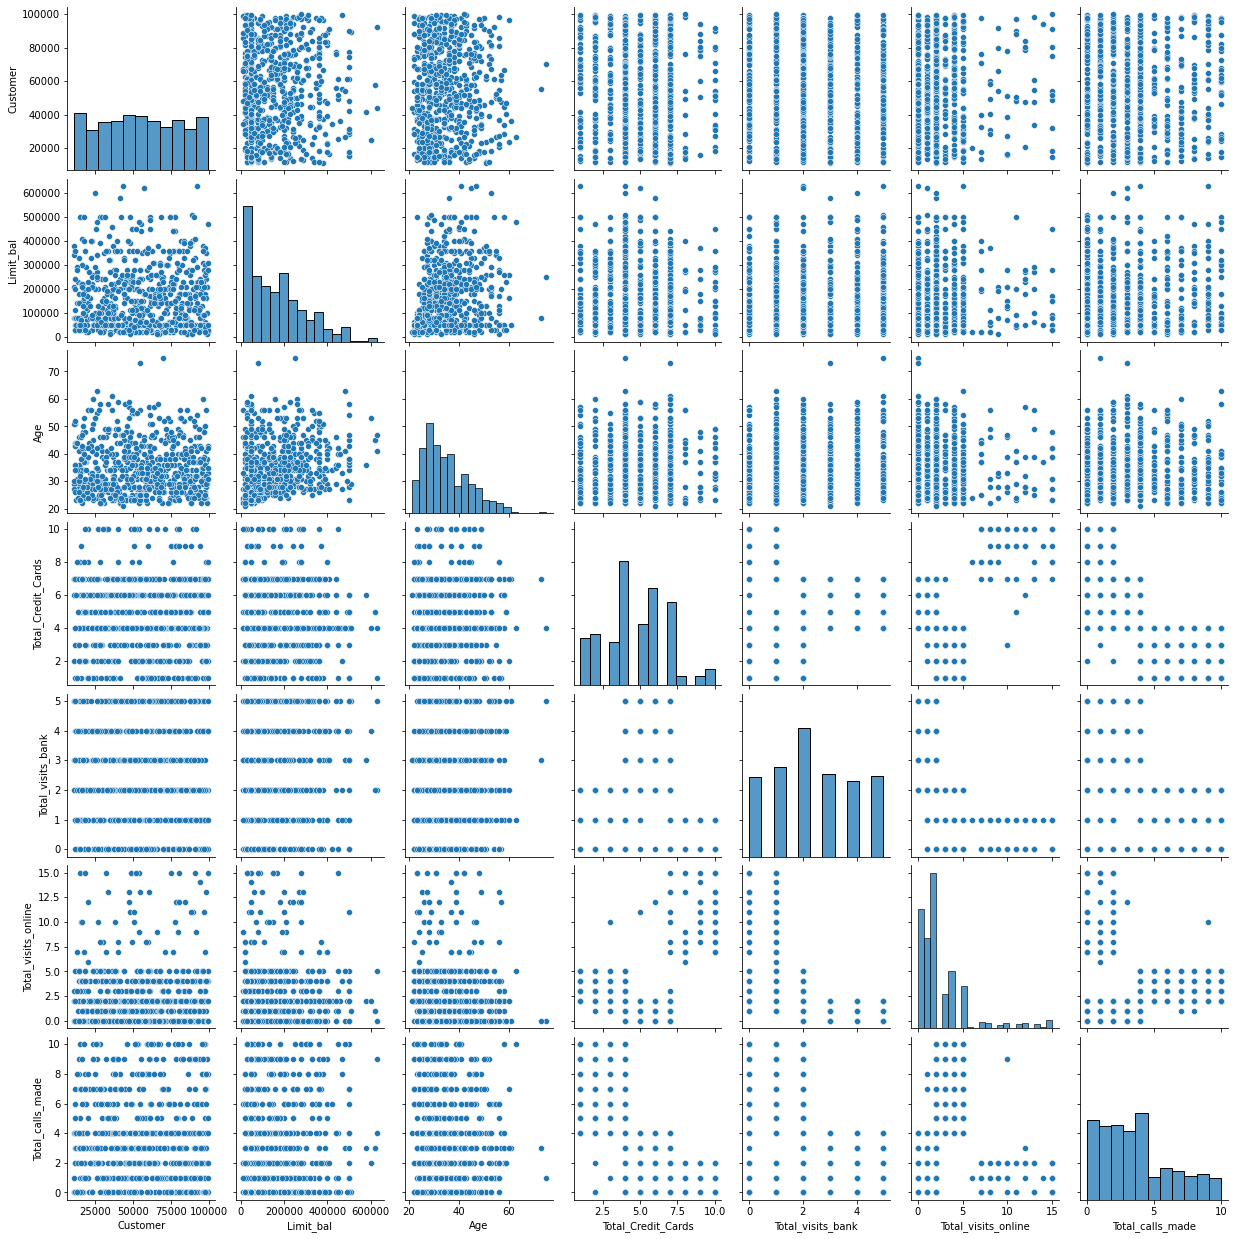

In [17]:
sns.pairplot(data=data_numeric);

Se identifican particiones en la muestra en **Total vistis online vs Total Credit Cards**, **Total vistis online vs Total calls made** , **Total Credit Cards vs. Total vists bank** y **Total calls made vs Total visits online** 

### Verificación de NA

In [18]:
data.isna().sum(axis=0)
data = data.dropna()
data

,Customer,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Id,,,,,,,,,,
1,87073.0,20000.0,Female,2,Married,24.0,2.0,1.0,1.0,0.0
2,38414.0,120000.0,Female,2,Single,26.0,3.0,0.0,10.0,9.0
3,17341.0,90000.0,Female,2,Single,34.0,7.0,1.0,3.0,4.0
5,47437.0,50000.0,Male,2,Married,57.0,6.0,0.0,12.0,3.0
6,58634.0,50000.0,Male,1,Single,37.0,3.0,0.0,1.0,8.0
...,...,...,...,...,...,...,...,...,...,...
656,51108.0,280000.0,Male,2,Married,39.0,10.0,1.0,10.0,0.0
657,60732.0,290000.0,Female,3,Single,27.0,10.0,1.0,13.0,2.0
658,53834.0,190000.0,Female,1,Single,28.0,8.0,1.0,9.0,1.0


### Encoding

In [19]:
enc = OneHotEncoder(handle_unknown='ignore')
labelencoder = LabelEncoder()
sex= labelencoder.fit_transform(data['Sex'])
sex = sex.reshape(len(sex),1)
sex = enc.fit_transform(sex)
sex= pd.DataFrame.sparse.from_spmatrix(sex)
sex = sex.rename(columns={0: 'Female', 1: 'Male'})
sex

,Female,Male
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0
...,...,...
634,0.0,1.0
635,1.0,0.0
636,1.0,0.0
637,1.0,0.0


In [20]:
edu= labelencoder.fit_transform(data['Education'])
edu = edu.reshape(len(edu),1)
edu = enc.fit_transform(edu)
edu= pd.DataFrame.sparse.from_spmatrix(edu)
edu =edu.rename(columns={0: 'L2', 1: 'L1',2:'L3',3:'L5',4:'L4'})
edu

,L2,L1,L3,L5,L4
0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
634,0.0,1.0,0.0,0.0,0.0
635,0.0,0.0,1.0,0.0,0.0
636,1.0,0.0,0.0,0.0,0.0
637,1.0,0.0,0.0,0.0,0.0


In [21]:
marri= labelencoder.fit_transform(data['Marriage'])
marri = marri.reshape(len(marri),1)
marri = enc.fit_transform(marri)
marri= pd.DataFrame.sparse.from_spmatrix(marri)
marri = marri.rename(columns={0: 'Married', 1: 'Single',2:'Others'})
marri

,Married,Single,Others
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
634,1.0,0.0,0.0
635,0.0,0.0,1.0
636,0.0,0.0,1.0
637,0.0,0.0,1.0


In [22]:
data

,Customer,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Id,,,,,,,,,,
1,87073.0,20000.0,Female,2,Married,24.0,2.0,1.0,1.0,0.0
2,38414.0,120000.0,Female,2,Single,26.0,3.0,0.0,10.0,9.0
3,17341.0,90000.0,Female,2,Single,34.0,7.0,1.0,3.0,4.0
5,47437.0,50000.0,Male,2,Married,57.0,6.0,0.0,12.0,3.0
6,58634.0,50000.0,Male,1,Single,37.0,3.0,0.0,1.0,8.0
...,...,...,...,...,...,...,...,...,...,...
656,51108.0,280000.0,Male,2,Married,39.0,10.0,1.0,10.0,0.0
657,60732.0,290000.0,Female,3,Single,27.0,10.0,1.0,13.0,2.0
658,53834.0,190000.0,Female,1,Single,28.0,8.0,1.0,9.0,1.0


### Encoded dataframe

In [23]:
#Mergeaer las columnas de sex 
sex =sex.set_index(data.index)
data["Gender"]=sex["Male"]
#Mergeaer las columnas de education
edu =edu.set_index(data.index)
data[edu.columns]=edu
#Mergeaer las columnas de marriage
marri =marri.set_index(data.index)
data[marri.columns]=marri
#Dropear columas originales
data=data.drop(columns=['Sex','Education','Marriage'])
data

,Customer,Limit_bal,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Gender,L2,L1,L3,L5,L4,Married,Single,Others
Id,,,,,,,,,,,,,,,,
1,87073.0,20000.0,24.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38414.0,120000.0,26.0,3.0,0.0,10.0,9.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,17341.0,90000.0,34.0,7.0,1.0,3.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,47437.0,50000.0,57.0,6.0,0.0,12.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,58634.0,50000.0,37.0,3.0,0.0,1.0,8.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,51108.0,280000.0,39.0,10.0,1.0,10.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
657,60732.0,290000.0,27.0,10.0,1.0,13.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
658,53834.0,190000.0,28.0,8.0,1.0,9.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
data

,Customer,Limit_bal,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Gender,L2,L1,L3,L5,L4,Married,Single,Others
Id,,,,,,,,,,,,,,,,
1,87073.0,20000.0,24.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38414.0,120000.0,26.0,3.0,0.0,10.0,9.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,17341.0,90000.0,34.0,7.0,1.0,3.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,47437.0,50000.0,57.0,6.0,0.0,12.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,58634.0,50000.0,37.0,3.0,0.0,1.0,8.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,51108.0,280000.0,39.0,10.0,1.0,10.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
657,60732.0,290000.0,27.0,10.0,1.0,13.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
658,53834.0,190000.0,28.0,8.0,1.0,9.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Eliminación de columnas

In [24]:
data = data.drop(columns=['Customer'])

### Escalamiento de datos

In [25]:
mms = MinMaxScaler()

data_norm = mms.fit_transform(data.copy())
saved_cols = data.columns

data_norm = pd.DataFrame(data_norm, columns =saved_cols)
data_norm

/Users/santiagocala/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/santiagocala/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


,Limit_bal,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Female,Male,L2,L1,L3,L5,L4,Married,Single,Others
0,0.016129,0.055556,0.111111,0.2,0.066667,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.177419,0.092593,0.222222,0.0,0.666667,0.9,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.129032,0.240741,0.666667,0.2,0.200000,0.4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.064516,0.666667,0.555556,0.0,0.800000,0.3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.064516,0.296296,0.222222,0.0,0.066667,0.8,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,0.435484,0.333333,1.000000,0.2,0.666667,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
635,0.451613,0.111111,1.000000,0.2,0.866667,0.2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
636,0.290323,0.129630,0.777778,0.2,0.600000,0.1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
637,0.112903,0.037037,1.000000,0.2,1.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Modelos 

In [26]:
def plot_distortion(data,k_min, k_max, ylabel = 'Distortion',xlabel = 'Number of clusters',title = 'Distortion Plot'):
    distortions = []
    for i in range(k_min, k_max):
        km = KMeans(n_clusters=i,
                 init='k-means++',
                 n_init=10,
                 max_iter=300,
                 random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)
    plt.plot(range(k_min,k_max), distortions, marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

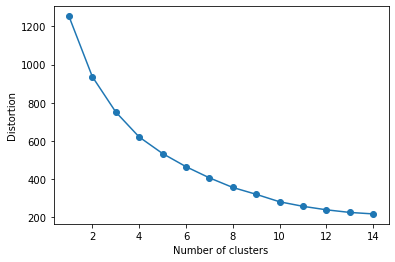

In [27]:
plot_distortion(data_norm,1,15);

### K Means

In [28]:
n_clusters=5
kmeans = KMeans(n_clusters=n_clusters, random_state=0) 
kmeans = kmeans.fit(data_norm)

In [29]:
labels = kmeans.labels_
data_norm['Cluster'] = labels
cluster_distrib = data['Cluster'].value_counts()
fig=plt.figure(figsize=(10,5))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='b');


KeyError: 'Cluster'

In [ ]:
colors = cm.rainbow(np.linspace(0, 1, cluster_distrib.shape[0]))
cols_number = data.to_numpy()
name_cols_number = data_norm.columns
vista_x=3
vista_y=6
fig=plt.figure(figsize=(10,5))
for i in range(0,n_clusters):
    plt.scatter(cols_number[kmeans.labels_ == i, vista_x], cols_number[kmeans.labels_ == i, vista_y], s = 50, c = colors[i], alpha =0.3, label = 'Cluster '+ str(i))

plt.scatter(kmeans.cluster_centers_[:, 5], kmeans.cluster_centers_[:, 6], s = 50,  marker='v', c = 'yellow', label = 'Centroids')
plt.title('Clusters of clients')
plt.xlabel(name_cols_number[vista_x])
plt.ylabel(name_cols_number[vista_y])
plt.legend()
plt.show();


In [ ]:
def plot_silhouette(data, labels, ylabel = 'Clústeres', xlabel = "Silhouette coefficient", title = 'Silhouette Plot'):

    cluster_labels = np.unique(labels)
    print(cluster_labels)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data,
                                        labels,
                                        metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                        c_silhouette_vals,
                        height=1.0,
                        edgecolor='none',
                        color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,color="red",linestyle="--")
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

In [ ]:
plot_silhouette(data = data_norm,  labels = kmeans.labels_, ylabel = 'Clustering with four clusters')

### DBSCAN

In [ ]:
range_eps = [0.2,0.3,0.4,0.5]
for i in range_eps:
    print("Valor de epsilon es: "+str(i))
    db = DBSCAN(eps=i, min_samples=5).fit(data_norm)
    core_samples_mask = np.zeros_like(db.labels_,dtype=bool)
    core_samples_mask[db.core_sample_indices_]=True
    labels = db.labels_
    print(set(labels))
    silhouette_avg = silhouette_score(data_norm, labels)
    print("Para epsilon ="+ str(i), labels,
         "El promedio silhouette_score es: ", silhouette_avg)

In [ ]:
min_samples = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
for i in min_samples:
    print("Valor de min_samples es "+str(i))
    db= DBSCAN(eps=0.5, min_samples=i).fit(data_norm)
    core_samples_mask = np.zeros_like(db.labels_,dtype=bool)
    core_samples_mask[db.core_sample_indices_]=True
    labels=set([label for label in db.labels_ if label>=0])
    print(set(labels))
    print("Para el valor de min_samples = "+str(i),"# total de clusters son "+ str(len(set(labels))))

In [ ]:
finalDB = DBSCAN(eps=0.5, min_samples=24).fit(data_norm)
core_samples_mask = np.zeros_like(db.labels_,dtype=bool)
core_samples_mask[db.core_sample_indices_]=True
labels= finalDB.labels_
print(set(labels))

n_clusters_ = len(set(labels))
n_noise_ = list(labels).count(-1)

print("# estimado de clusters: %d" % n_clusters_)
print("# estimado de noise points: %d" % n_noise_)

In [ ]:
colores ={}
colores[0] = 'r'
colores[1] = 'g'
colores[2] = 'b'
colores[-1] = 'k'
colores[3] = 'y'
colores[4] = 'm'

vectorColor= [colores[label] for label in labels]

r=plt.scatter(data_norm["Total_visits_bank"], data_norm["Total_visits_online"], color = "r");
g=plt.scatter(data_norm["Total_visits_bank"], data_norm["Total_visits_online"], color = "g");
b=plt.scatter(data_norm["Total_visits_bank"], data_norm["Total_visits_online"], color = "b");
k=plt.scatter(data_norm["Total_visits_bank"], data_norm["Total_visits_online"], color = "k");
y=plt.scatter(data_norm["Total_visits_bank"], data_norm["Total_visits_online"], color = "y");
p=plt.scatter(data_norm["Total_visits_bank"], data_norm["Total_visits_online"], color = "m");

plt.figure(figsize=(12,12))
plt.scatter(data_norm["Total_visits_bank"], data_norm["Total_visits_online"], c = vectorColor)

plt.legend((r,g,b,k,y), ("Cluster 0","Cluster 1","Cluster 2","Cluster -1","Cluster 3","Cluster 4"))

plt.show()

### Aglomerative Clustering

In [ ]:
data_norm

In [ ]:
data_norm
X = data_norm.drop(columns=["Cluster"])
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [ ]:
n_clusters = 3
agclustering = AgglomerativeClustering(n_clusters, affinity='euclidean', linkage='ward')
agclustering.fit(X)
labels = agclustering.labels_
data_norm['ClusterAGC'] = labels
data_norm

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


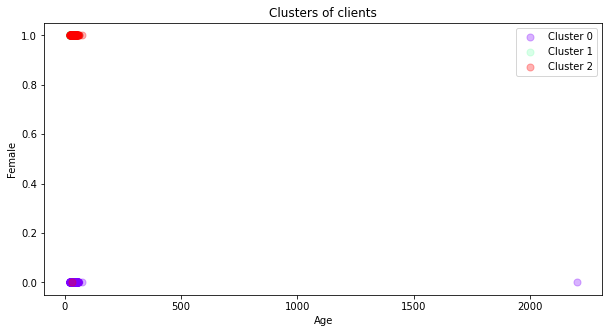

In [106]:
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cols_number = data.to_numpy()
name_cols_number = data_norm.columns
vista_x=1
vista_y=6
fig=plt.figure(figsize=(10,5))
for i in range(0,n_clusters):
    plt.scatter(cols_number[agclustering.labels_ == i, vista_x], cols_number[agclustering.labels_ == i, vista_y], s = 50, c = colors[i], alpha =0.3, label = 'Cluster '+ str(i))

plt.title('Clusters of clients')
plt.xlabel(name_cols_number[vista_x])
plt.ylabel(name_cols_number[vista_y])
plt.legend()
plt.show();

[0 1 2]


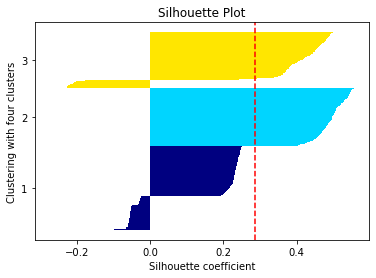

In [107]:
plot_silhouette(data = data_norm,  labels = agclustering.labels_, ylabel = 'Clustering with four clusters')